<a href="https://colab.research.google.com/github/brunopdrocha/SNLP_IBMEC/blob/main/4_Diabetes_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning - Diabetes

- Bruno Pilão

- Fernanda Moyses

- Maria Mello

- Larissa Nobrega

Com base no [collab](https://colab.research.google.com/github/brunopdrocha/SNLP_IBMEC/blob/main/3_Bruno_Pilão_Diabetes.ipynb) (onde vou realizada a nossa EDA) vamos realizar uma predição de classificação com modelos de Deep Leanirng para comparar se terá uma melhora de acertividade em busca de pessoas com pré-diabete e diabete

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Vamos importar o dataset que foi utilizado para nossa predição
df = pd.read_csv('/content/drive/MyDrive/diabetes_012_health_indicators_v2.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Stroke,HeartDiseaseorAttack,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,Sex,Age,Income,Fruits_Vegetables,Physical_Health_Index
0,0.0,1.0,1.0,1.0,40.0,0.0,0.0,1.0,0.0,5.0,18.0,0.0,9.0,3.0,1.0,-15.0
1,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,7.0,1.0,0.0,0.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,1.0,1.0,5.0,30.0,0.0,9.0,8.0,1.0,-30.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,11.0,6.0,2.0,0.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,11.0,4.0,2.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

# Definindo as colunas de features (certifique-se de que os nomes estejam corretos)
features = ['HighBP'	,'HighChol'	,'CholCheck',
            'BMI',	'Stroke',	'HeartDiseaseorAttack',
            'AnyHealthcare',	'NoDocbcCost',	'GenHlth',
            'MentHlth',	'Sex',	'Age',	'Income',	'Fruits_Vegetables',
            'Physical_Health_Index']

# Seleciona as features e a variável alvo
X = df[features]
y = df['Diabetes_012']

# Divide os dados em conjunto de treinamento e teste (70% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=42, stratify=y
)

print(f'Base de Treinamento: {X_train.shape}')
print(f'Base de Teste: {X_test.shape}')


Base de Treinamento: (69009, 15)
Base de Teste: (161023, 15)


In [ ]:
from imblearn.over_sampling import ADASYN

# Define a estratégia para o ADASYN: para as classes 1 e 2, o total desejado é o especificado.
#sampling_strategy = {1: 2400, 2: 15000}

# Instancia o ADASYN com a estratégia definida
adasyn = ADASYN(random_state=42)
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)

In [ ]:
# Verificando Se amostra de dados está com a distribuição correta
print(pd.Series(y_train).value_counts())
print(pd.Series(y_train_res).value_counts())

Diabetes_012
0.0    57016
2.0    10604
1.0     1389
Name: count, dtype: int64
Diabetes_012
1.0    57184
0.0    57016
2.0    56396
Name: count, dtype: int64


## Modelagem com RNA MLP

In [ ]:
# Parâmetros do treinamento e modelo
EPOCHS = 20
BATCH_SIZE = 128
NB_CLASSES = 3   # Número de classes


In [ ]:
# One hot-encoding para dados categóricos
y_train_res = tf.keras.utils.to_categorical(y_train_res, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_res.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(NB_CLASSES, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,379 (146.01 KB)

 Trainable params: 37,379 (146.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Treinamento do modelo
history = model.fit(X_train_res, y_train_res,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )


Epoch 1/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4182 - loss: 1.1307 - val_accuracy: 0.5473 - val_loss: 0.9739
Epoch 2/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4900 - loss: 0.9885 - val_accuracy: 0.6163 - val_loss: 0.8546
Epoch 3/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5083 - loss: 0.9668 - val_accuracy: 0.5918 - val_loss: 0.8886
Epoch 4/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5302 - loss: 0.9401 - val_accuracy: 0.6543 - val_loss: 0.7810
Epoch 5/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5534 - loss: 0.9104 - val_accuracy: 0.6105 - val_loss: 0.8480
Epoch 6/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.5658 - loss: 0.8890 - val_accuracy: 0.6664 - val_loss: 0.7751
Epoch 7/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5808 - loss: 0.8653 - val_accuracy: 0.7321 - val_loss: 0.6824
Epoch 8/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5921 - loss: 0.8

In [ ]:
# Evaluate the model in TEST set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Making prediction in TEST set
predictions = model.predict(X_test)


5032/5032 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7321 - loss: 0.6728
Test accuracy: 0.7324047088623047
5032/5032 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


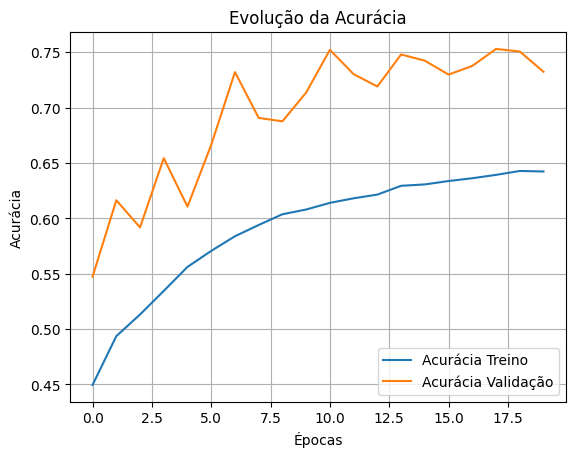

In [ ]:
# Visualizando o histórico de treino
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.legend()
plt.title('Evolução da Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.grid(True)
plt.show()


## Comparando os diferentes otimizadores

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adadelta, Adagrad, RMSprop, Adam
from sklearn.metrics import accuracy_score
import time

In [ ]:
# Definição para construção de modelo
batch_size=128
num_classes=3
epochs=20

In [ ]:
# Criação de Rede para testar modelos RNA
def build_model(optimizer):
    model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(X_train_res.shape[1],)),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(NB_CLASSES, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
import time
from sklearn.metrics import classification_report, confusion_matrix


def train_and_evaluate(opt_name):
    """
    Treina o modelo com o otimizador especificado,
    retorna as métricas, o relatório de classificação e a matriz de confusão,
    e plota os gráficos de acurácia por época e da matriz de confusão.
    """

    print("\nOtimizador:", opt_name, "\n")

    # Constrói o modelo com o otimizador atual
    model = build_model(opt_name)

    # Mede o tempo de treinamento
    start = time.time()
    hist = model.fit(
        X_train_res, y_train_res,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        validation_data=(X_test, y_test)
    )
    end = time.time()

    # Faz predições no conjunto de teste
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)

    # Converte y_test para labels, se necessário
    y_test_labels = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

    # Gera o relatório de classificação e a matriz de confusão
    report = classification_report(y_test_labels, y_pred, digits=4)
    conf_matrix = confusion_matrix(y_test_labels, y_pred)

    # Armazena as métricas do otimizador
    results = {
        'Loss': round(hist.history['loss'][-1], 4),
        'Val_Loss': round(hist.history['val_loss'][-1], 4),
        'Acc': round(hist.history['accuracy'][-1], 4),
        'Val_Acc': round(hist.history['val_accuracy'][-1], 4),
        'Exec_Time': round(end - start, 4)
    }

    # Plot da evolução da acurácia
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.plot(hist.history['accuracy'], label='Acurácia Treino')
    plt.plot(hist.history['val_accuracy'], label='Acurácia Validação')
    plt.legend()
    plt.title(f'Evolução da Acurácia - {opt_name}')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.grid(True)
    plt.show()

    # Plot da matriz de confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusão - {opt_name}')
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.show()

    return results, report



Otimizador: SGD 

Epoch 1/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3929 - loss: 1.1848 - val_accuracy: 0.5049 - val_loss: 1.0383
Epoch 2/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4428 - loss: 1.0337 - val_accuracy: 0.5607 - val_loss: 0.9523
Epoch 3/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4600 - loss: 1.0177 - val_accuracy: 0.5295 - val_loss: 0.9841
Epoch 4/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4731 - loss: 1.0083 - val_accuracy: 0.5215 - val_loss: 1.0008
Epoch 5/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4774 - loss: 1.0023 - val_accuracy: 0.5237 - val_loss: 0.9985
Epoch 6/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4843 - loss: 0.9971 - val_accuracy: 0.5631 - val_loss: 0.9328
Epoch 7/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4824 - loss: 0.9971 - val_accuracy: 0.5969 - val_loss: 0.8828
Epoch 8/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy:

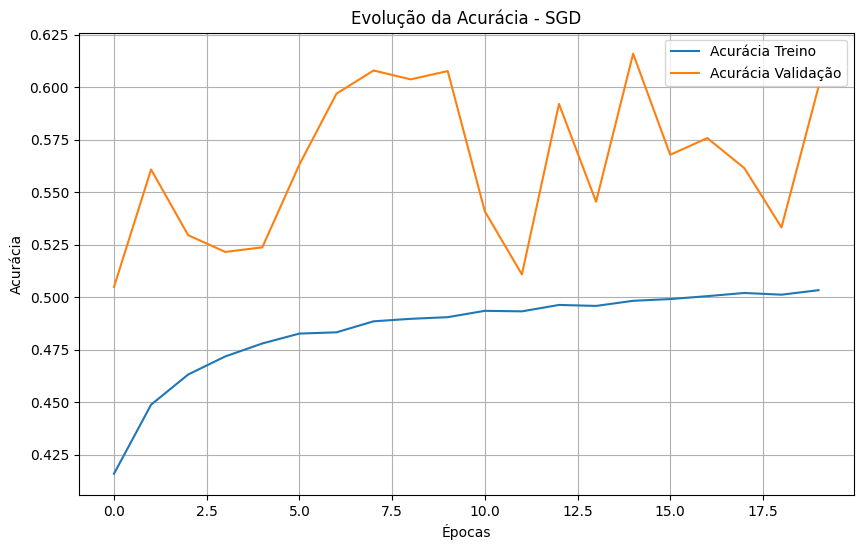

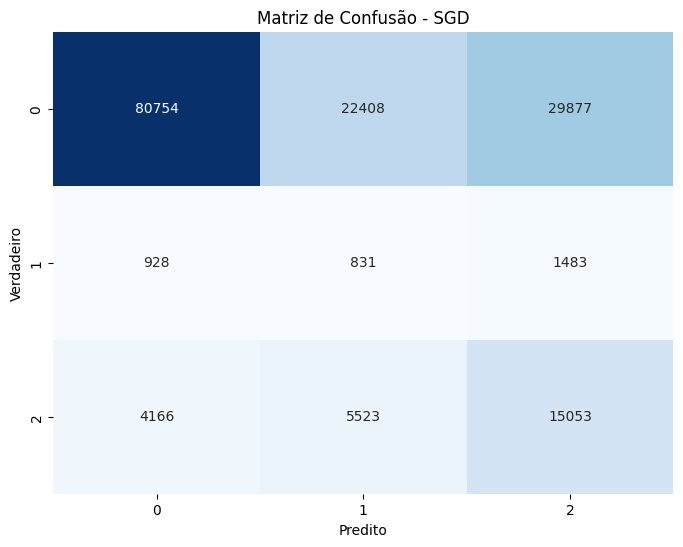


=== Resultados para SGD ===
Métricas: {'Loss': 0.9765, 'Val_Loss': 0.8649, 'Acc': 0.5033, 'Val_Acc': 0.6002, 'Exec_Time': 251.4206}

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9407    0.6070    0.7379    133039
           1     0.0289    0.2563    0.0519      3242
           2     0.3243    0.6084    0.4231     24742

    accuracy                         0.6002    161023
   macro avg     0.4313    0.4906    0.4043    161023
weighted avg     0.8276    0.6002    0.6757    161023


Otimizador: Adadelta 

Epoch 1/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.3422 - loss: 2.2261 - val_accuracy: 0.6986 - val_loss: 0.9091
Epoch 2/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.3449 - loss: 1.9826 - val_accuracy: 0.7070 - val_loss: 0.8787
Epoch 3/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.3489 - loss: 1.8716 - val_accuracy: 0.7021 - val_loss: 0.8819
Epoch 4/20
1333/1333 ━━━━━━━━━━━━━━━━

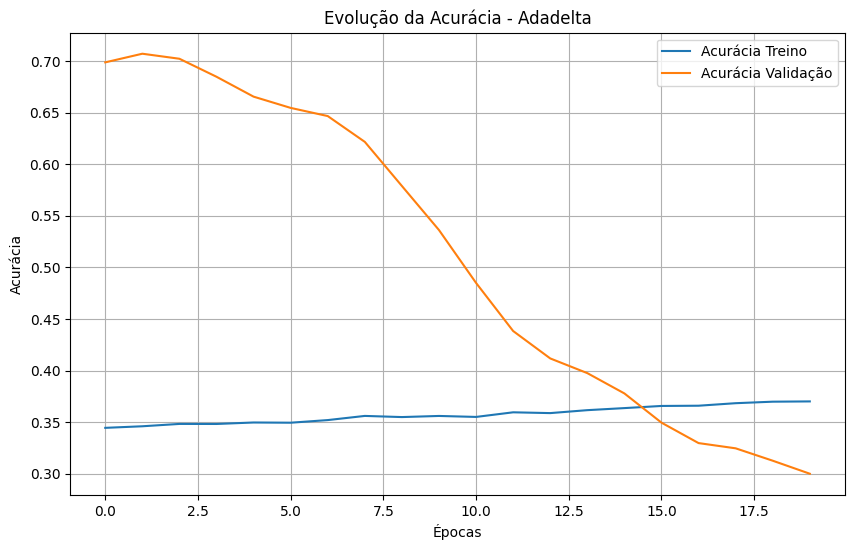

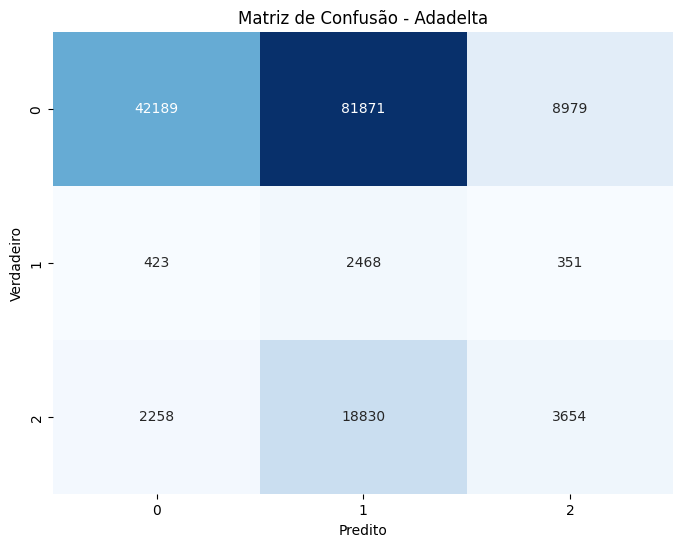


=== Resultados para Adadelta ===
Métricas: {'Loss': 1.1881, 'Val_Loss': 1.1145, 'Acc': 0.3701, 'Val_Acc': 0.3, 'Exec_Time': 287.2602}

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9402    0.3171    0.4743    133039
           1     0.0239    0.7613    0.0464      3242
           2     0.2814    0.1477    0.1937     24742

    accuracy                         0.3000    161023
   macro avg     0.4152    0.4087    0.2381    161023
weighted avg     0.8206    0.3000    0.4226    161023


Otimizador: Adagrad 

Epoch 1/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.3493 - loss: 1.5739 - val_accuracy: 0.2032 - val_loss: 1.1685
Epoch 2/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3694 - loss: 1.1384 - val_accuracy: 0.3059 - val_loss: 1.1314
Epoch 3/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3764 - loss: 1.1100 - val_accuracy: 0.3472 - val_loss: 1.1220
Epoch 4/20
1333/1333 ━━━━━━━━━━━━━━━━━━

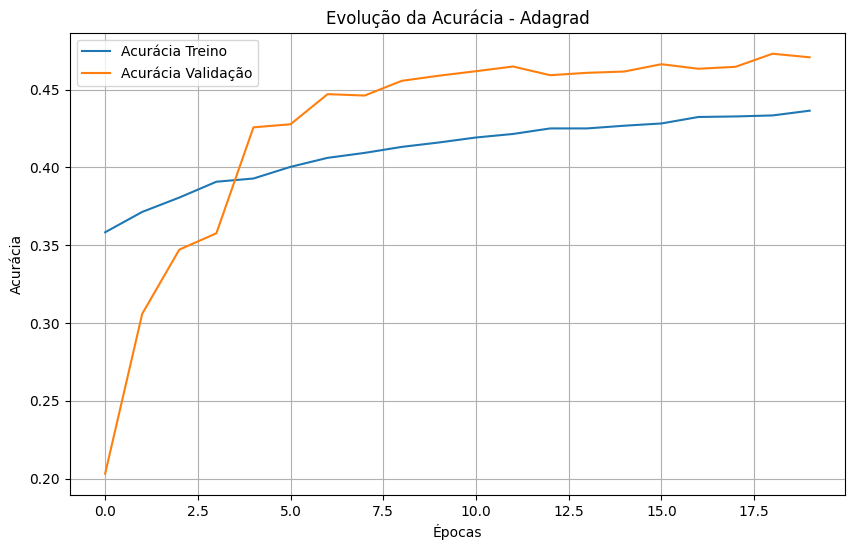

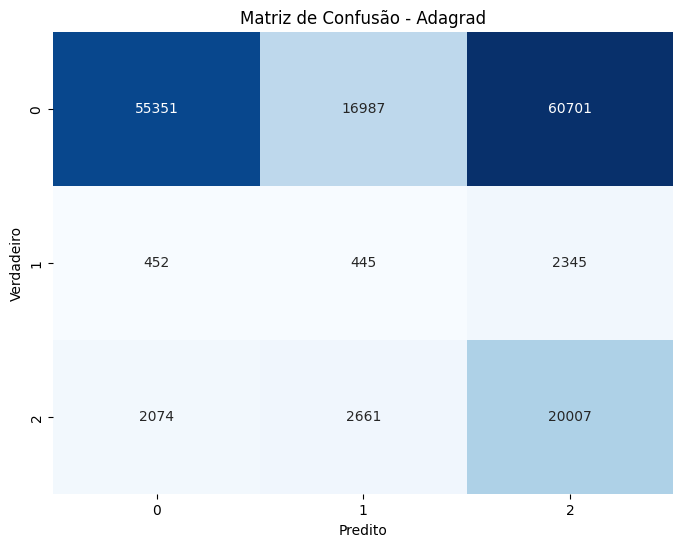


=== Resultados para Adagrad ===
Métricas: {'Loss': 1.0427, 'Val_Loss': 1.0569, 'Acc': 0.4365, 'Val_Acc': 0.4708, 'Exec_Time': 298.3862}

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9564    0.4161    0.5798    133039
           1     0.0221    0.1373    0.0381      3242
           2     0.2409    0.8086    0.3712     24742

    accuracy                         0.4708    161023
   macro avg     0.4065    0.4540    0.3297    161023
weighted avg     0.8276    0.4708    0.5369    161023


Otimizador: RMSprop 

Epoch 1/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4257 - loss: 1.1223 - val_accuracy: 0.6468 - val_loss: 0.8540
Epoch 2/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4965 - loss: 0.9812 - val_accuracy: 0.5910 - val_loss: 0.8751
Epoch 3/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5215 - loss: 0.9537 - val_accuracy: 0.6453 - val_loss: 0.8081
Epoch 4/20
1333/1333 ━━━━━━━━━━━━━━

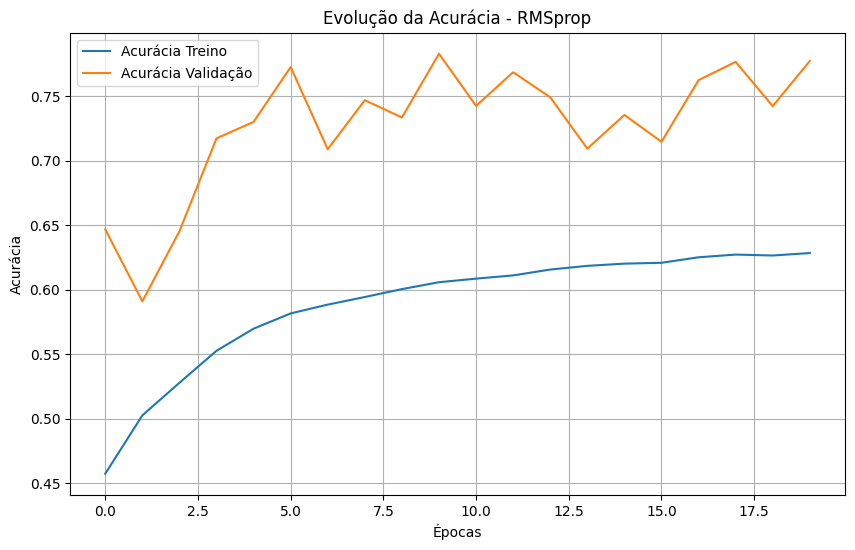

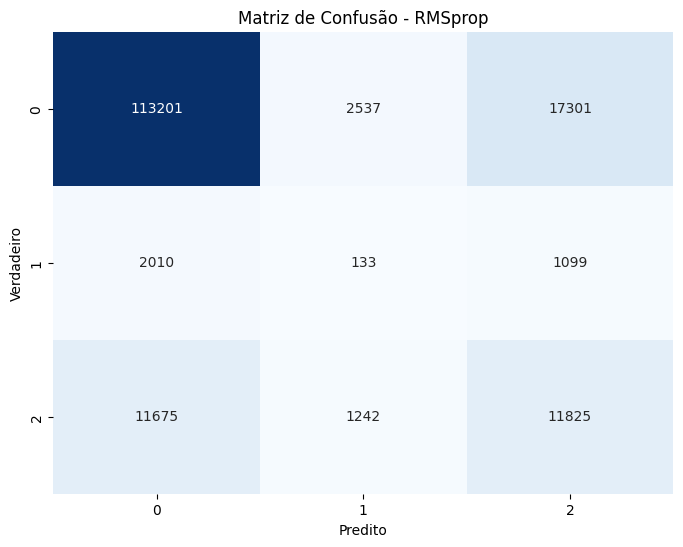


=== Resultados para RMSprop ===
Métricas: {'Loss': 0.7836, 'Val_Loss': 0.6094, 'Acc': 0.6284, 'Val_Acc': 0.7773, 'Exec_Time': 241.9506}

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.8921    0.8509    0.8710    133039
           1     0.0340    0.0410    0.0372      3242
           2     0.3912    0.4779    0.4303     24742

    accuracy                         0.7773    161023
   macro avg     0.4391    0.4566    0.4462    161023
weighted avg     0.7979    0.7773    0.7865    161023


Otimizador: Adam 

Epoch 1/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4131 - loss: 1.1560 - val_accuracy: 0.5450 - val_loss: 0.9814
Epoch 2/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4878 - loss: 0.9919 - val_accuracy: 0.5682 - val_loss: 0.8969
Epoch 3/20
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5086 - loss: 0.9675 - val_accuracy: 0.5799 - val_loss: 0.9403
Epoch 4/20
1333/1333 ━━━━━━━━━━━━━━━━━━

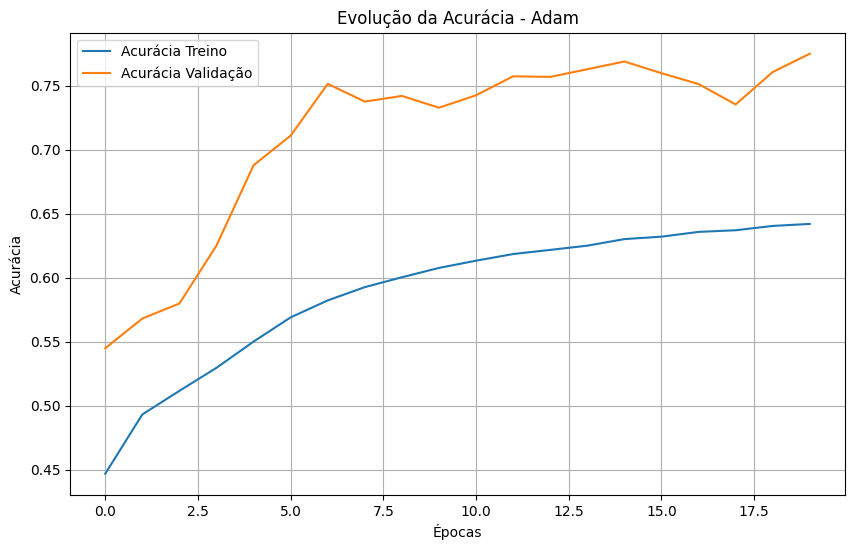

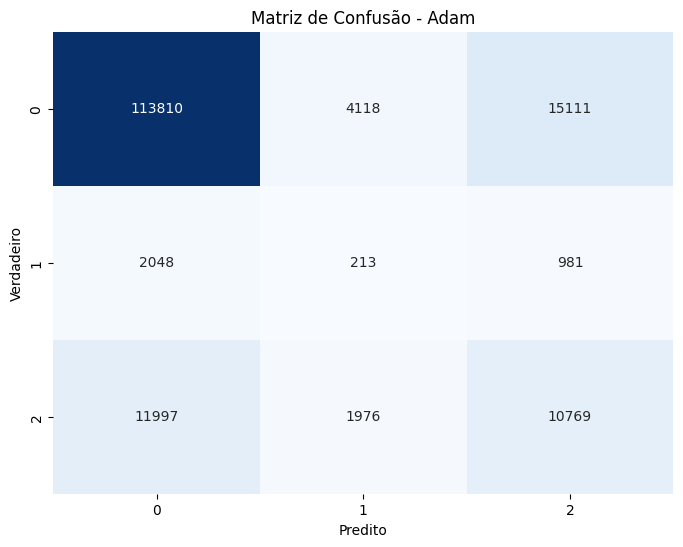


=== Resultados para Adam ===
Métricas: {'Loss': 0.7555, 'Val_Loss': 0.6108, 'Acc': 0.6421, 'Val_Acc': 0.775, 'Exec_Time': 263.0463}

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.8901    0.8555    0.8725    133039
           1     0.0338    0.0657    0.0446      3242
           2     0.4009    0.4353    0.4174     24742

    accuracy                         0.7750    161023
   macro avg     0.4416    0.4521    0.4448    161023
weighted avg     0.7977    0.7750    0.7859    161023



In [ ]:
# Lista de otimizadores a serem testados
optimizers_list = ['SGD', 'Adadelta', 'Adagrad', 'RMSprop', 'Adam']
all_results = {}

for opt in optimizers_list:
    res, report = train_and_evaluate(opt)
    all_results[opt] = res

    print("\n=== Resultados para {} ===".format(opt))
    print("Métricas:", res)
    print("\nRelatório de Classificação:\n", report)



